#  Third Lab-work Image Processing MAIA 2021

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import string
import time

from scipy import signal
from PIL import Image

# 3

## 3.1
Done by hand

## 3.2

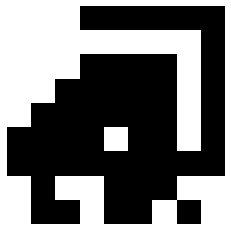

In [2]:
# Load the image
im = np.array([
    [20, 20, 20, 10, 10, 10, 10, 10, 10],
    [20, 20, 20, 20, 20, 20, 20, 20, 10],
    [20, 20, 20, 10, 10, 10, 10, 20, 10],
    [20, 20, 10, 10, 10, 10, 10, 20, 10],
    [20, 10, 10, 10, 10, 10, 10, 20, 10],
    [10, 10, 10, 10, 20, 10, 10, 20, 10],
    [10, 10, 10, 10, 10, 10, 10, 10, 10],
    [20, 10, 20, 20, 10, 10, 10, 20, 20],
    [20, 10, 10, 20, 10, 10, 20, 10, 20],
])
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.show()

In [3]:
# Load the kernels
ka = np.array([[-1, -1, 0], [-1, 0, 1], [0, 1, 1]])
kb = np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]])
kc = np.array([[-1, -1, -1], [2, 2, 2], [-1, -1, -1]])
kd = np.array([[-1, 2, -1], [-1, 2, -1], [-1, 2, -1]])
ke = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kf = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
kg = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
kh = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
kernels = [ka, kb, kc, kd, ke, kf, kg, kh]

In [4]:
# Comparing times between sckit image and cv2

# time_cv2 = []
# time_scikit = []
# for kernel in kernels:
#     for i in range(1000):
#         start = time.time()
#         out = signal.convolve2d(im, kernel, mode='same', boundary='fill', fillvalue=0)
#         time_cv2.append(time.time()-start)
        
#         start = time.time()
#         out = cv2.filter2D(im.astype('float32'), -1, kernel)
#         time_scikit.append(time.time()-start)
        
# print(f'Time with cv2: {np.mean(time_cv2)}')
# print(f'Time with scikit: {np.mean(time_scikit)}')

In [5]:
for k, name in enumerate(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']):
    out = signal.convolve2d(im, kernels[k], mode='same', boundary='fill', fillvalue=0)
    print(f'Array filtered with kernel {name}')
    display(out)

Array filtered with kernel a


array([[-60, -40, -30, -30, -40, -40, -40, -30,   0],
       [-40,   0,  10,  10,   0,   0, -10,   0,  30],
       [-40,  10,  30,  30,  20,  20,   0,  10,  40],
       [-30,  30,  30,  10,   0,   0, -20,   0,  40],
       [-10,  30,  10, -10, -10,   0, -20,   0,  40],
       [-10,  10,   0, -10,   0,  10, -10,  10,  40],
       [-30, -10, -20, -10,  10,  10, -10, -10,  20],
       [-30,   0, -20,   0,  10, -10, -20, -20,  20],
       [ 10,  40,  20,  40,  40,  10,  20,  30,  50]])

Array filtered with kernel b


array([[  0, -40, -50, -50, -40, -40, -40, -40, -40],
       [ 40,   0, -10, -10,   0,   0,   0, -20, -40],
       [ 40,   0,   0,  10,  20,  20,  30,   0, -40],
       [ 40,   0,   0,   0,   0,   0,  20,   0, -40],
       [ 40,   0,   0,   0, -10, -10,  20,   0, -40],
       [ 30,   0,   0,  10,   0, -10,  20,  10, -30],
       [ 10, -10, -10, -10,   0,   0,  10,   0, -40],
       [ 10, -10,  10, -20, -20,   0,   0,   0, -40],
       [ 40,  20,  50,  30,  10,  30,  30,  40,  10]])

Array filtered with kernel c


array([[ 40,  60,  40,  20,   0,   0,   0,  10,  10],
       [  0,   0,  20,  40,  60,  60,  50,  30,  10],
       [  0,  10,   0, -10, -30, -30, -20, -10,   0],
       [ 10,   0,   0, -10,   0,   0,   0,   0,   0],
       [  0,   0, -10, -10, -10, -10,   0,   0,   0],
       [-10, -10,   0,  20,  20,  20,  10,  10,  10],
       [-10, -20, -20, -30, -20, -10, -20, -30, -30],
       [ 10,  30,  30,  30,  10, -10,  10,  20,  30],
       [ 30,  30,  30,  30,  40,  50,  40,  50,  20]])

Array filtered with kernel d


array([[ 40,   0,  10, -10,   0,   0,   0,  10,  10],
       [ 60,   0,  20, -20,   0,   0, -10,  30,  10],
       [ 60,  10,   0, -10,   0,   0, -20,  50,   0],
       [ 70,   0,   0, -10,   0,   0, -30,  60,   0],
       [ 60,   0, -10, -10,  20, -10, -30,  60,   0],
       [ 50, -10,   0, -10,  20, -10, -20,  40,  10],
       [ 50, -20,  10,   0,  10, -10, -20,  30,  30],
       [ 70, -30,   0,  30, -20, -10,  10, -10,  60],
       [ 60, -30,   0,  30, -20, -10,  10, -10,  50]])

Array filtered with kernel e


array([[100,  60,  70, -10,   0,   0,   0,  10,  40],
       [ 60,   0,  20,  40,  60,  60,  50,  60,  10],
       [ 60,  10,  30, -40, -30, -30, -50,  50,   0],
       [ 70,  30, -30, -10,   0,   0, -30,  60,   0],
       [ 90, -30, -10, -10, -10, -10, -30,  60,   0],
       [ 20, -10,   0, -10,  80, -10, -20,  70,  10],
       [ 20, -20, -20, -30, -20, -10, -20, -30,   0],
       [100, -30,  60,  60, -20, -10, -20,  50,  90],
       [120,   0,   0,  90,  10,  20, 100, -10, 110]])

Array filtered with kernel f


array([[ 80, 120, 110, 100,  90,  90,  90,  80,  50],
       [120, 180, 160, 140, 120, 120, 130, 120,  80],
       [120, 170, 150, 130, 120, 120, 140, 130,  90],
       [110, 150, 120, 100,  90,  90, 120, 120,  90],
       [ 90, 120, 100, 100, 100, 100, 120, 120,  90],
       [ 70, 100,  90, 100, 100, 100, 110, 110,  80],
       [ 70, 110, 110, 120, 110, 100, 110, 120,  90],
       [ 80, 120, 120, 120, 110, 100, 110, 130,  90],
       [ 60,  90,  90,  90,  80,  70,  80, 100,  70]])

Array filtered with kernel g


array([[-40,   0,  10,  10,   0,   0,   0,  10,  30],
       [-60,   0,  20,  20,   0,   0, -10,  10,  50],
       [-60,  10,  20,  10,   0,   0, -20,  10,  60],
       [-50,  20,  20,  10,   0,   0, -30,   0,  60],
       [-40,  20,  10, -10,   0,  10, -30,   0,  60],
       [-30,  10,   0, -10,   0,  10, -20,   0,  50],
       [-30,   0, -10,   0,  10,  10, -20, -10,  50],
       [-30,  10, -20,  10,  20, -10, -10, -10,  40],
       [-20,  10, -20,  10,  20, -10, -10, -10,  30]])

Array filtered with kernel h


array([[ 40,  20,  30, -10,   0,   0,   0,   0,  20],
       [ 20,   0,   0,  20,  20,  20,  20,  20,   0],
       [ 20,   0,  20, -20, -10, -10, -20,  20,   0],
       [ 20,  20, -20,   0,   0,   0, -10,  20,   0],
       [ 40, -20,   0,   0, -10,   0, -10,  20,   0],
       [  0,   0,   0, -10,  40, -10, -10,  30,   0],
       [  0,   0, -10, -10, -10,   0,   0, -20,   0],
       [ 40, -20,  30,  20, -10,   0, -20,  30,  30],
       [ 50,   0, -10,  40,   0,   0,  50, -20,  50]])

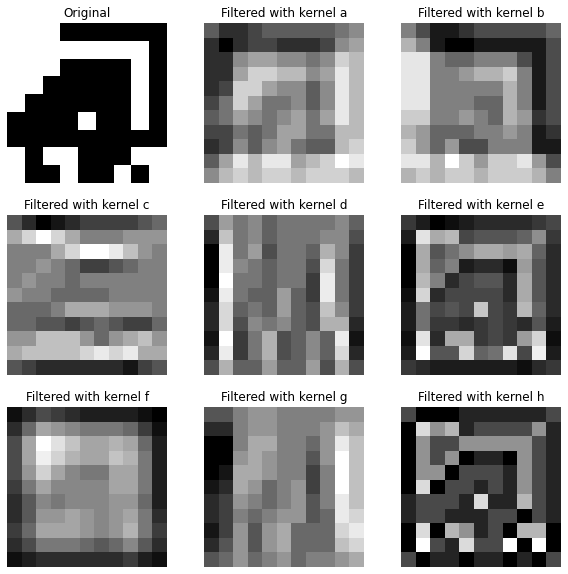

In [6]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
alphabet = string.ascii_lowercase
for k in range(len(kernels)+1):
    if k == 0:
        title = 'Original'
        ax[k//3, k%3].imshow(im, cmap='gray')
        ax[0,0].axis('off')
    else:
        title = f'Filtered with kernel {alphabet[k-1]}'
        ax[k//3, k%3].imshow(signal.convolve2d(im, kernels[k-1]), cmap='gray')
    ax[k//3, k%3].set_title(title)
    ax[k//3, k%3].axis('off')

## 3.3

- Mask a): It can be used to identify borders in the 45° diagonal
- Mask b): It can be used to identify borders in the -45° diagonal
- Mask c): It can be used to identify horizontal borders.
- Mask d): It can be used to identify vertical borders.
- Mask e): It can be used to identify omnidirectional borders (contours). It is a Laplacian filter, so it's also doing a smoothing of the image at the same time of the border detection. This results in a better highlight of contours ignoring noise (high frequencies)
- Mask f): It is a smoothing/blurring filter, but as it's not divided by the total numer of values in the kernel the resulting image will also have an increase in intensity.
- Mask g): It can be used to identify vertical borders.
- Mask h): It can be used to identify veritcal and horizontal borders (contours). It is also Laplacian filter, so it's also doing a smoothing of the image at the same time of the border detection. This results in a better highlight of contours ignoring noise (high frequencies)

## 3.4

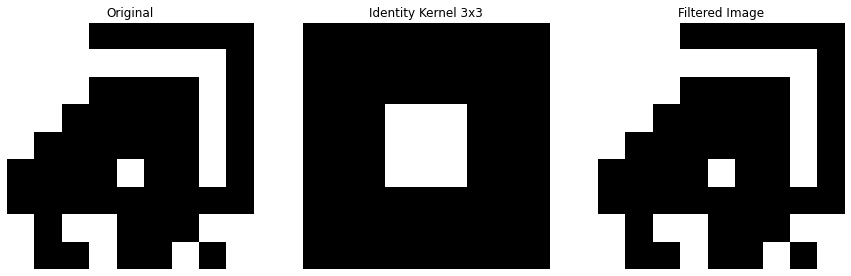

In [7]:
kernel = np.zeros((3,3))
kernel[1,1] = 1
out = signal.convolve2d(im, kernel, mode='same', boundary='fill', fillvalue=0)
if (im == out).all():
    fig, ax = plt.subplots(1, 3, figsize=(15,5))
    ax[0].set_title('Original')
    ax[0].imshow(im, cmap='gray')
    ax[0].axis('off')
    ax[1].set_title('Identity Kernel 3x3')
    ax[1].imshow(kernel, cmap='gray')
    ax[1].axis('off')
    ax[2].set_title('Filtered Image')
    ax[2].imshow(out, cmap='gray')
    ax[2].axis('off')

## 3.5

In [8]:
# im = scipy.io.loadmat('./mandrill.mat') 
# im_ = Image.fromarray(im['X'])
# im_.putpalette(im['map'])
# The mat file just contains a unique matrix of floats, it doesn't proide the LUT, so it's ignored and 
# the .tiff image is used

In [9]:
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)

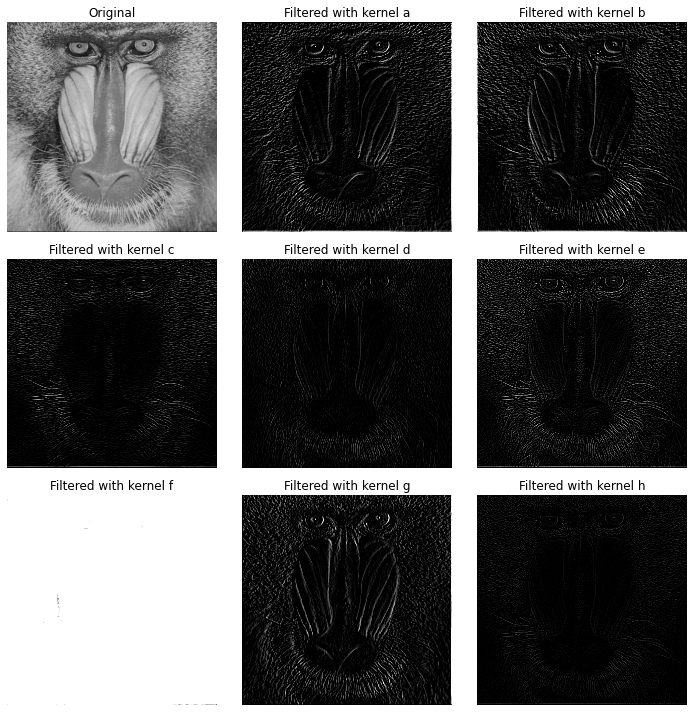

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
alphabet = string.ascii_lowercase
for n in range(len(kernels)+1):
    if n == 0:
        title = 'Original'
        ax[n//3, n%3].imshow(im, cmap='gray', vmin=0, vmax=255)
        ax[0,0].axis('off')
    else:
        title = f'Filtered with kernel {alphabet[n-1]}'
        ax[n//3, n%3].imshow(signal.convolve2d(im, kernels[n-1]), cmap='gray', vmin=0, vmax=255)
    ax[n//3, n%3].set_title(title)
    ax[n//3, n%3].axis('off')
plt.tight_layout()

## 3.6

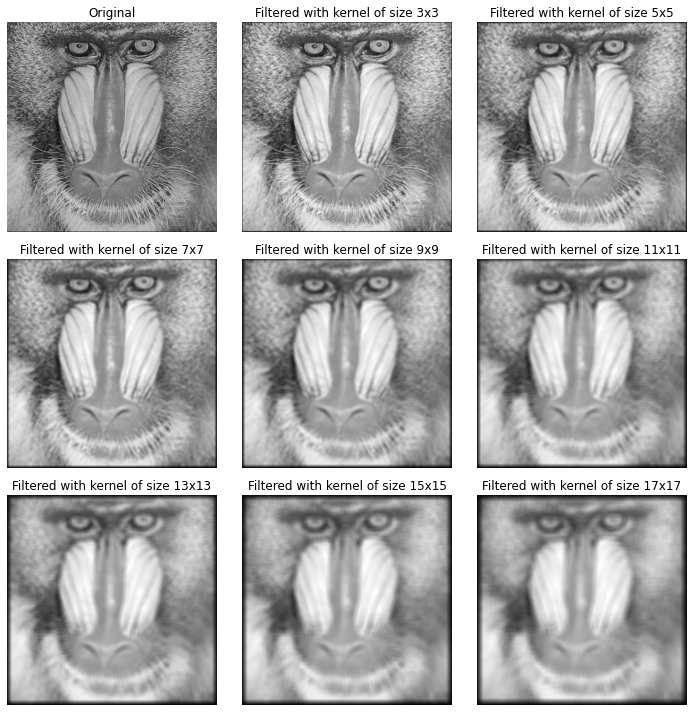

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(10,10))
for i, k in enumerate(range(1,18,2)):
    kernel = np.ones((k,k))/(k^2)
    if i == 0:
        title = 'Original'
        ax[i//3, i%3].imshow(im, cmap='gray', vmin=0, vmax=255)
    else:
        title = f'Filtered with kernel of size {k}x{k}'
        ax[i//3, i%3].imshow(signal.convolve2d(im, kernel), cmap='gray')
    ax[i//3, i%3].set_title(title)
    ax[i//3, i%3].axis('off')
plt.tight_layout()

Whith a kernel of size 9x9 the whishkers, then with a kernel of size 17x17 the wishkers can distinguished at all.

## 3.7

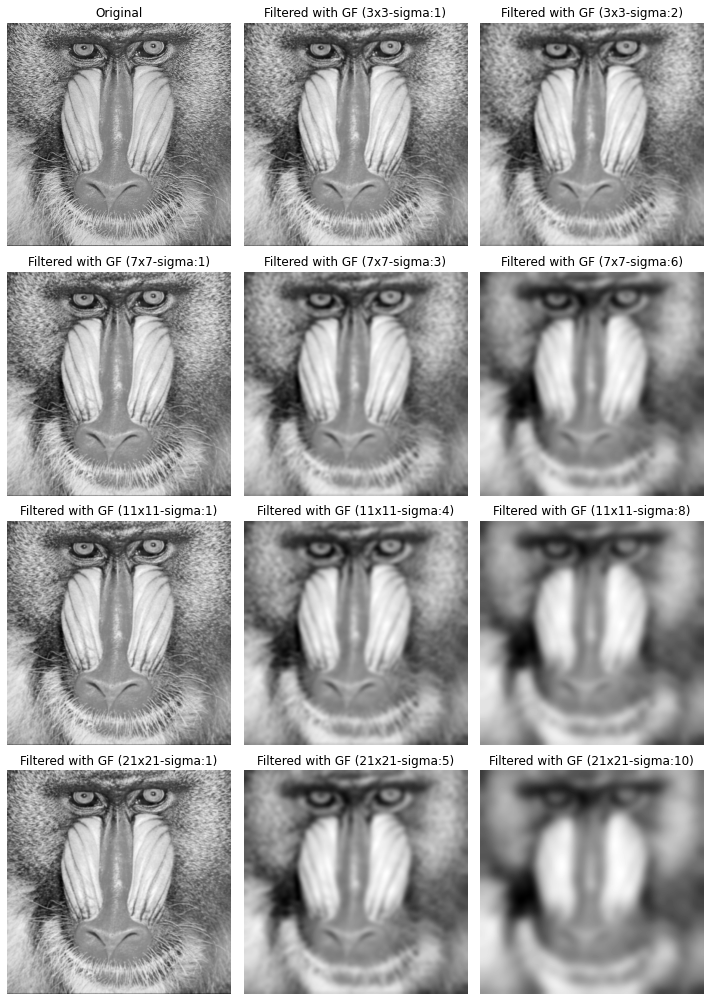

In [12]:
fig, ax = plt.subplots(4, 3, figsize=(10, 14))
kernel_sigmas = {
    3: [0.5, 1, 2],
    7: [1, 3, 6],
    11: [1, 4, 8],
    21: [1, 5, 10],
}
for i, ks in enumerate(kernel_sigmas.keys()):
    for j in range(3):
        if (i==0) and (j==0):
            title = f'Original'
            ax[i,j].imshow(im, cmap='gray')
        else:
            sigma = kernel_sigmas[ks][j]
            ax[i, j].imshow(scipy.ndimage.gaussian_filter(im, sigma, mode='mirror'), cmap='gray')
            title = f'Filtered with GF ({ks}x{ks}-sigma:{sigma})'
        ax[i, j].set_title(title)
        ax[i, j].axis('off')
plt.tight_layout()

The wishkers can't be distinguished with the kernels:
- 7x7 --> sigma: 6
- 11x11 --> sigma: 4 and sigma: 8
- 21x21 --> sigma: 5 and sigma: 10

## 3.8

The available filters in matlab's function are:

- h = fspecial(**'average'**,hsize) returns an averaging filter h of size hsize.

- h = fspecial(**'disk'**,radius) returns a circular averaging filter (pillbox) within the square matrix of size 2**radius+1.

- h = fspecial(**'gaussian'**,hsize,sigma) returns a rotationally symmetric Gaussian lowpass filter of size hsize with standard deviation sigma. Not recommended. Use imgaussfilt or imgaussfilt3 instead.

- h = fspecial(**'laplacian'**,alpha) returns a 3-by-3 filter approximating the shape of the two-dimensional Laplacian operator, alpha controls the shape of the Laplacian.

- h = fspecial(**'log'**,hsize,sigma) returns a rotationally symmetric Laplacian of Gaussian filter of size hsize with standard deviation sigma.

- h = fspecial(**'motion'**,len,theta) returns a filter to approximate, once convolved with an image, the linear motion of a camera. len specifies the length of the motion and theta specifies the angle of motion in degrees in a counter-clockwise direction. The filter becomes a vector for horizontal and vertical motions. The default len is 9 and the default theta is 0, which corresponds to a horizontal motion of nine pixels.

- h = fspecial(**'prewitt'**) returns a 3-by-3 filter that emphasizes horizontal edges by approximating a vertical gradient. To emphasize vertical edges, transpose the filter h'.

        [ 1  1  1 
          0  0  0 
         -1 -1 -1 ]

- h = fspecial(**'sobel'**) returns a 3-by-3 filter that emphasizes horizontal edges using the smoothing effect by approximating a vertical gradient. To emphasize vertical edges, transpose the filter h'.

        [ 1  2  1 
          0  0  0 
         -1 -2 -1 ]

##### In python we can generate them as:

In [13]:
from skimage import morphology, filters
from scipy import ndimage

In [17]:
def apply_8_filters(im, size=7):
    fig, ax = plt.subplots(3, 3, figsize=(10, 10))
    filters_ = ['None', 'Average', 'Disk', 'Gaussian', 'Laplacian', 'LoG', 'Motion', 'Prewitt','Sobel']
    for n, kernel in enumerate(filters_):
        if n == 0:
            title = 'Original'
            ax[n//3, n%3].imshow(im, cmap='gray', vmin=0, vmax=255)
            ax[0,0].axis('off')
        else:
            title = f'{kernel} filter'
            if kernel =='Average':
                filtered = filters.rank.mean(im, selem=np.ones((size, size)))
            elif kernel == 'Disk':
                filtered = filters.rank.mean(im, selem=morphology.disk(size))
            elif kernel == 'Gaussian':
                filtered = ndimage.gaussian_filter(im, 3)
            elif kernel == 'Laplacian':
                filtered = filters.laplace(im, size)
            elif kernel == 'LoG':
                filtered = ndimage.gaussian_laplace(im, 3)
            elif kernel == 'Motion':
                kernel = np.zeros((size, size))
                kernel[int((size-1)/2), :] = np.ones(size) / size
                filtered = signal.convolve2d(
                    im, kernel, mode='same', boundary='fill', fillvalue=0
                )
            elif kernel == 'Prewitt':
                filtered = ndimage.prewitt(im)
            elif kernel == 'Sobel':
                filtered = ndimage.sobel(im, 0)
                
            ax[n//3, n%3].imshow(filtered, cmap='gray', vmin=0, vmax=255)
            ax[n//3, n%3].set_title(title)
            ax[n//3, n%3].axis('off')
    plt.tight_layout()

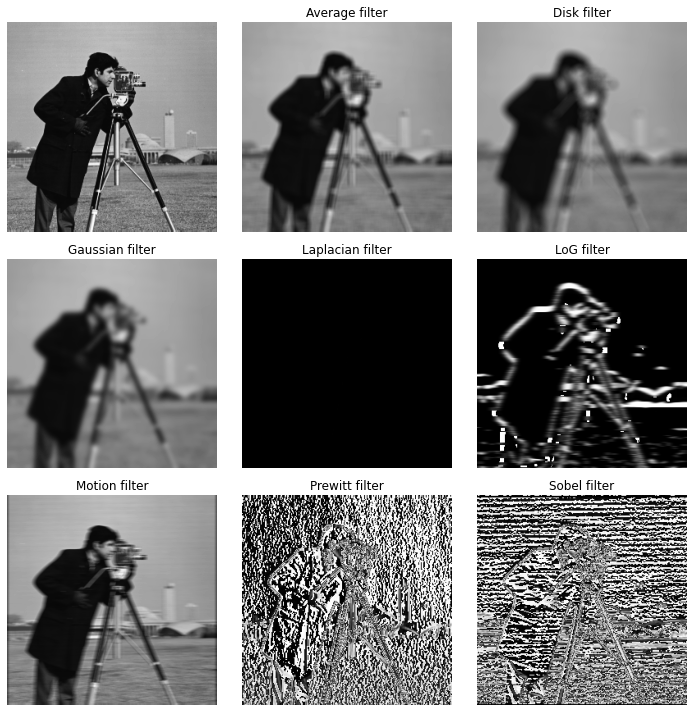

In [18]:
im = cv2.imread('../lab1/images/cameraman.png', cv2.IMREAD_GRAYSCALE)
apply_8_filters(im)

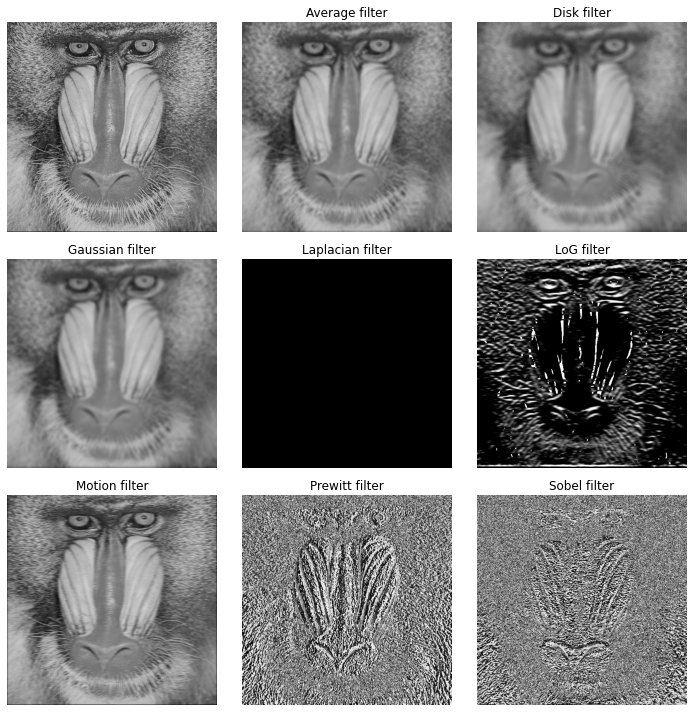

In [19]:
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)
apply_8_filters(im)

## 3.9

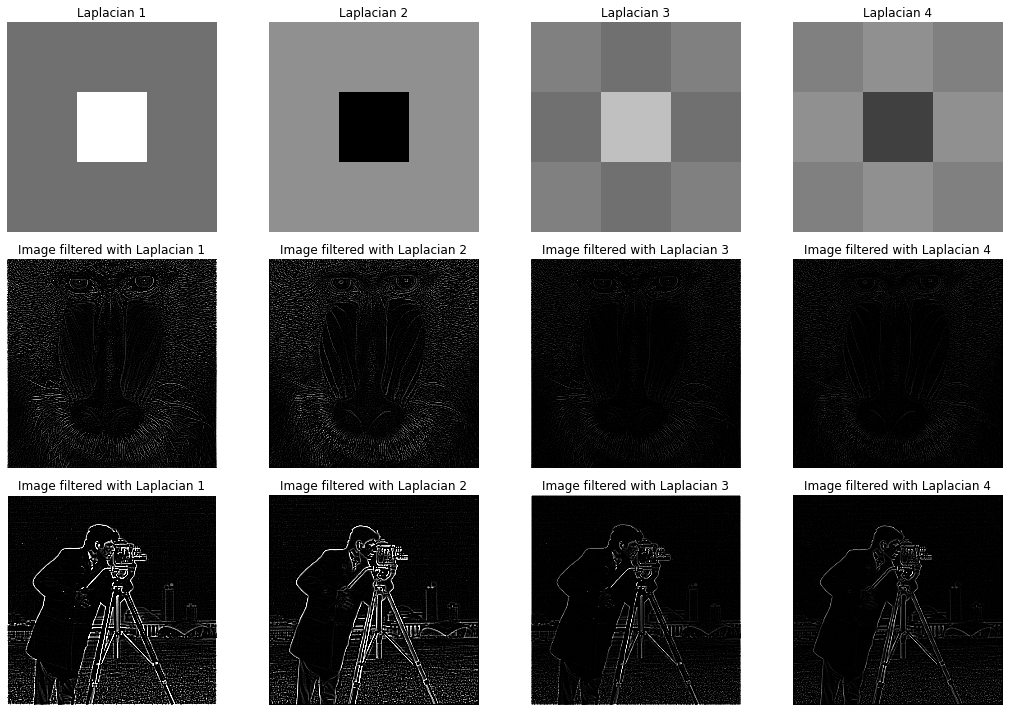

In [20]:
l1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
l3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
l2, l4 = -l1, -l3

fig, ax = plt.subplots(3, 4, figsize=(15, 10))
for i in range(3):
    for j, lap in enumerate([l1, l2, l3, l4]):
        if (i==0):
            ax[i, j].imshow(lap, cmap='gray', vmin=-8, vmax=8)
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Laplacian {j+1}')
            continue
        elif i==1:
            im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)
        else:
            im = cv2.imread('../lab1/images/cameraman.png', cv2.IMREAD_GRAYSCALE)
        filtered = signal.convolve2d(im, lap, mode='same', boundary='fill', fillvalue=0)
        ax[i, j].imshow(filtered, cmap='gray', vmin=0, vmax=255)
        ax[i, j].axis('off')
        ax[i, j].set_title(f'Image filtered with Laplacian {j+1}')
plt.tight_layout()
plt.show()

The omnidirectional laplacian (Laplacian 1 and Laplacian 2 in the figures) is the one with a better performance. Between the sign inversion. both of them highlight different borders, the one containing 8 at the centers seems to generate a more clear contours image.

##  3.10

### 3.10.a

Matlab's documentation is confusing:

- Speaking about **filter2**:

     "The filter2 function filters data by ***taking the 2-D convolution of the input X and the coefficient matrix H rotated 180 degrees***. Specifically, filter2(H,X,shape) is equivalent to conv2(X,rot90(H,2),shape)."

- Speaking about **imfilter**:

    As an aditional argument one cane use: *Correlation and Convolution Options*
        
    - 'corr':

        imfilter performs multidimensional filtering using correlation,***which is the same way that filter2 performs filtering***. When no correlation or convolution option is specified, imfilter uses correlation.

    - 'conv':
            
         imfilter performs multidimensional filtering using convolution.
        
From the first definition if you rotate the kernel 180° you get the bi-dimensional folded version of the kernel, and if you do the convolution using that kernel it will be re-folded, so at the end no folding is beeing applied, which coincides with the definition of the default behaviour of imfilter. Conluding, both functions apply a correlation and only imfilter can do the convolution if the specific argument is used.

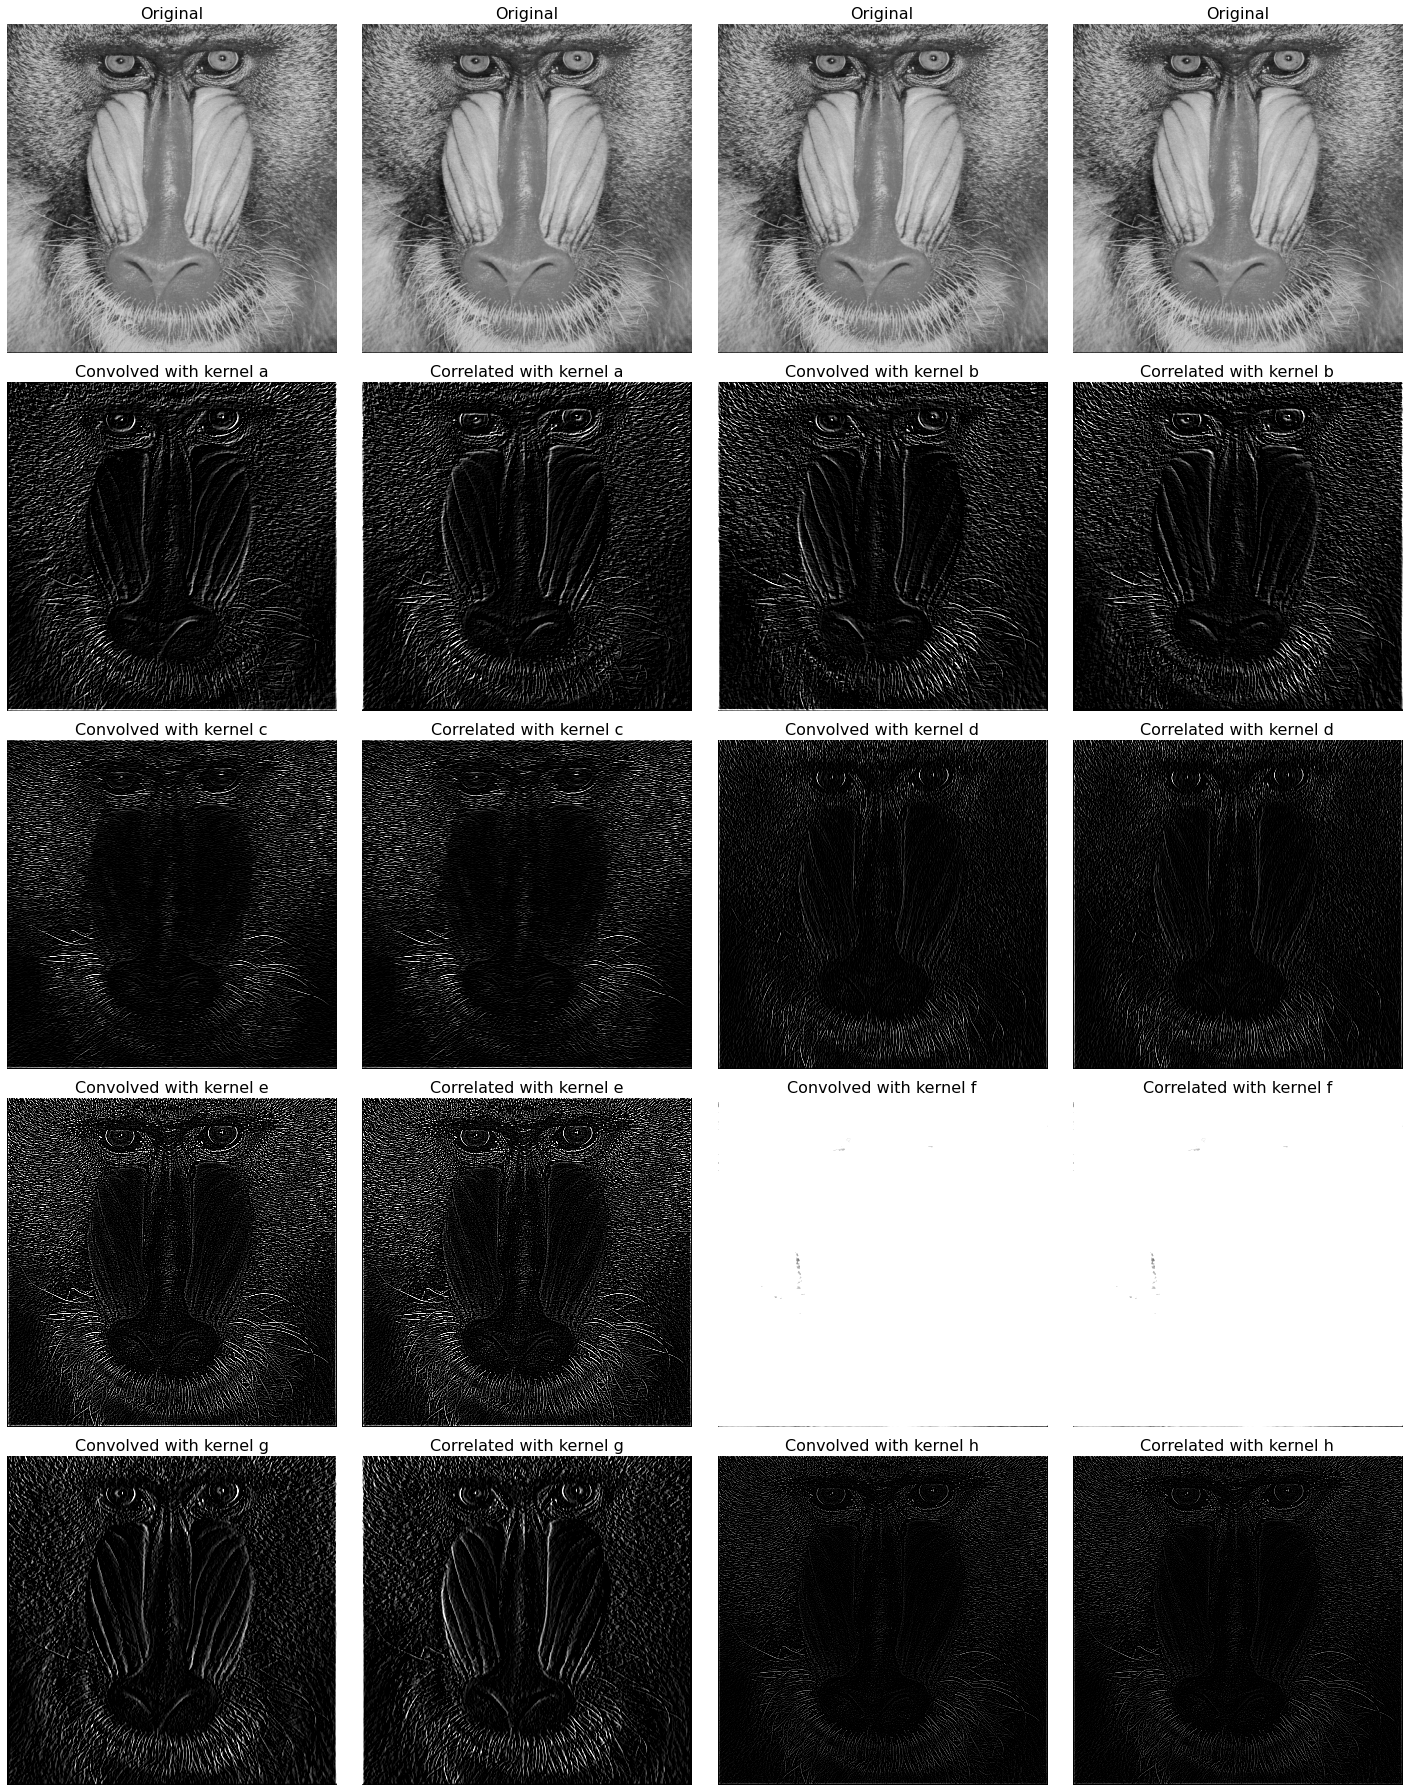

In [21]:
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(5, 4, figsize=(20, 25))
alphabet = string.ascii_lowercase
for i in range(5):
    if i == 0:
        title = 'Original'
        for j in range(4):
            ax[i,j].imshow(im, cmap='gray', vmin=0, vmax=255)
            ax[i,j].axis('off')
            ax[i,j].set_title(f'Original', fontsize=16)
    else:
        for j in range(2):
            ki = 2*(i-1)+j
            ax[i, 2*j].imshow(signal.convolve2d(im, kernels[ki]), cmap='gray', vmin=0, vmax=255)
            ax[i, 2*j].set_title(f'Convolved with kernel {alphabet[ki]}', fontsize=16)
            ax[i, 2*j].axis('off')
            ax[i, 2*j+1].imshow(signal.correlate2d(im, kernels[ki]), cmap='gray', vmin=0, vmax=255)
            ax[i, 2*j+1].set_title(f'Correlated with kernel {alphabet[ki]}', fontsize=16)
            ax[i, 2*j+1].axis('off')
plt.tight_layout()

##### As expected the results are the same for all the kernels except from the first 2, because they are not simetric

 ### 3.10.b

The results of filtering the images with the different averaging filters are going to be the same for both method since averaging filters are simetric.

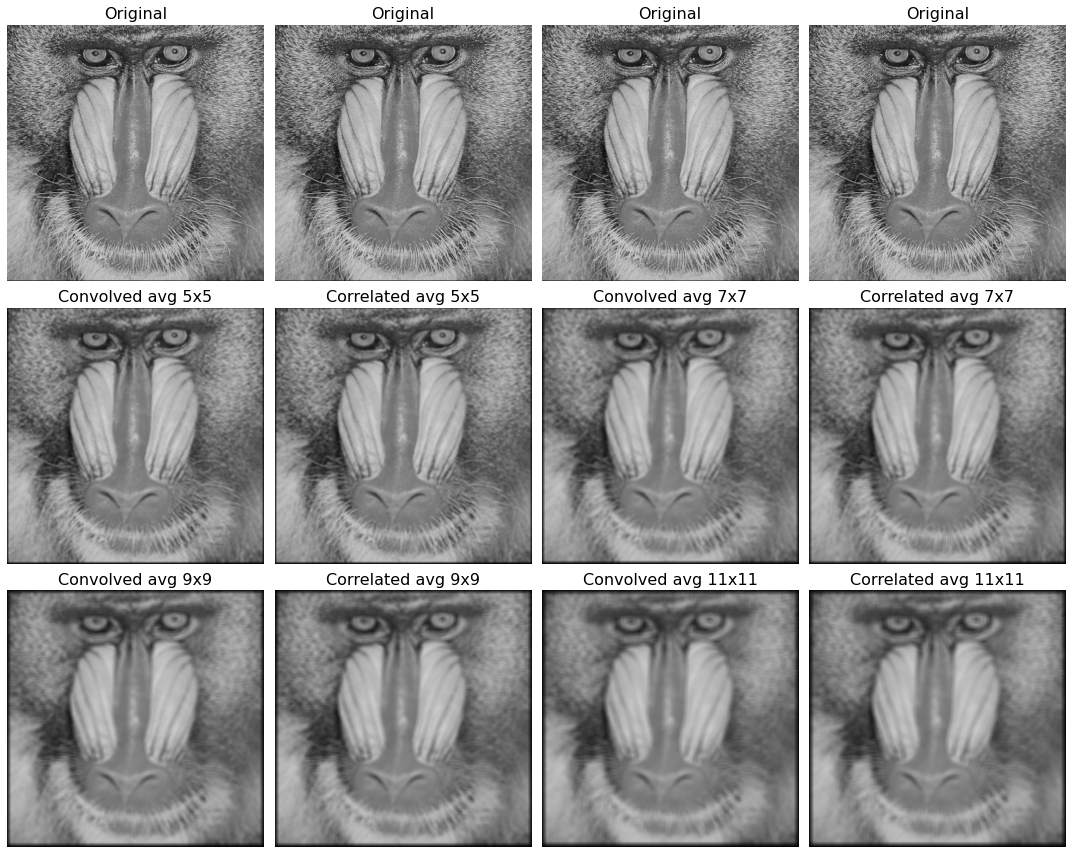

In [22]:
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)
fig, ax = plt.subplots(3, 4, figsize=(15,12))
for i in range(3):
    if i == 0:
        title = 'Original'
        for j in range(4):
            ax[i,j].imshow(im, cmap='gray', vmin=0, vmax=255)
            ax[i,j].axis('off')
            ax[i,j].set_title(f'Original', fontsize=16)
    else:
        for j in range(2):
            fs = 2*(2*(i)+j)+1
            kernel = np.ones((fs,fs))/(fs**2)
            ax[i, 2*j].imshow(signal.convolve2d(im, kernel), cmap='gray', vmin=0, vmax=255)
            ax[i, 2*j].set_title(f'Convolved avg {fs}x{fs}', fontsize=16)
            ax[i, 2*j].axis('off')
            ax[i, 2*j+1].imshow(signal.correlate2d(im, kernel), cmap='gray', vmin=0, vmax=255)
            ax[i, 2*j+1].set_title(f'Correlated avg {fs}x{fs}', fontsize=16)
            ax[i, 2*j+1].axis('off')
plt.tight_layout()

In [23]:
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)

for i in range(3):
    if i == 0:
        title = 'Original'
        for j in range(4):
            ax[i,j].imshow(im, cmap='gray', vmin=0, vmax=255)
            ax[i,j].axis('off')
            ax[i,j].set_title(f'Original', fontsize=16)
    else:
        for j in range(2):
            fs = 2*(2*(i)+j)+1
            kernel = np.ones((fs,fs))/(fs**2)
            ax[i, 2*j].imshow(signal.convolve2d(im, kernel), cmap='gray', vmin=0, vmax=255)
            ax[i, 2*j].set_title(f'Convolved avg {fs}x{fs}', fontsize=16)
            ax[i, 2*j].axis('off')
            ax[i, 2*j+1].imshow(signal.correlate2d(im, kernel), cmap='gray', vmin=0, vmax=255)
            ax[i, 2*j+1].set_title(f'Correlated avg {fs}x{fs}', fontsize=16)
            ax[i, 2*j+1].axis('off')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>

 ### 3.10.c


The results of filtering the images with the different laplacians are going to be the same for both method since laplacian filters are simetric.

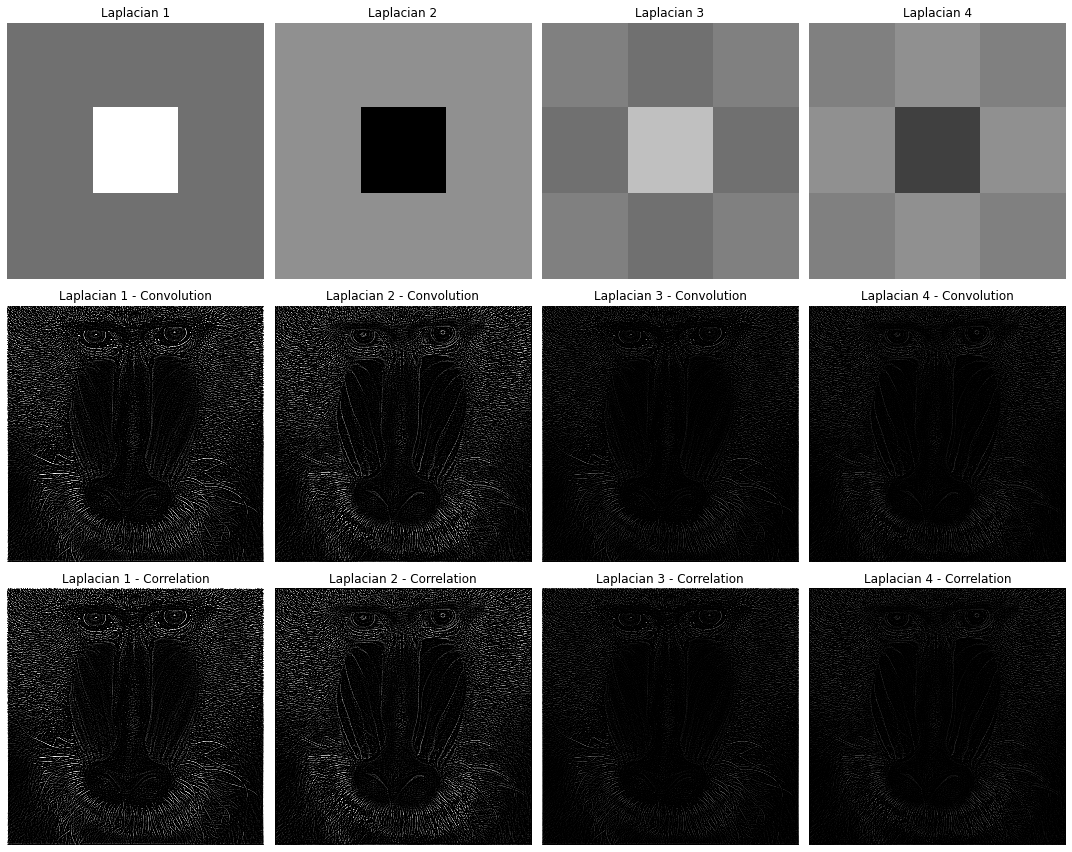

In [24]:
fig, ax = plt.subplots(3, 4, figsize=(15, 12))
l1 = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
l3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]])
l2, l4 = -l1, -l3
im = cv2.imread('./mandrill.tiff', cv2.IMREAD_GRAYSCALE)
for i in range(3):
    for j, lap in enumerate([l1, l2, l3, l4]):
        if (i==0):
            ax[i, j].imshow(lap, cmap='gray', vmin=-8, vmax=8)
            ax[i, j].axis('off')
            ax[i, j].set_title(f'Laplacian {j+1}')
            continue
        elif i==1:
            filtered = signal.convolve2d(im, lap)
            title = f'Laplacian {j+1} - Convolution'
        else:
            filtered = signal.correlate2d(im, lap)
            title = f'Laplacian {j+1} - Correlation'
        filtered = signal.convolve2d(im, lap, mode='same', boundary='fill', fillvalue=0)
        ax[i, j].imshow(filtered, cmap='gray', vmin=0, vmax=255)
        ax[i, j].axis('off')
        ax[i, j].set_title(title)
plt.tight_layout()
plt.show()